## Summary notes

Visualising the average annual cost of College tuition fees in the USA.

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Happy to announce the newest <a href="https://twitter.com/hashtag/R4DS?src=hash&amp;ref_src=twsrc%5Etfw">#R4DS</a> online learning community project! <a href="https://twitter.com/hashtag/TidyTuesday?src=hash&amp;ref_src=twsrc%5Etfw">#TidyTuesday</a> is your weekly <a href="https://twitter.com/hashtag/tidyverse?src=hash&amp;ref_src=twsrc%5Etfw">#tidyverse</a> practice!<br><br>Each week we&#39;ll post data and a plot at <a href="https://t.co/8NaXR93uIX">https://t.co/8NaXR93uIX</a> under the datasets link.<br><br>You clean the data and tweak the plot in R!<a href="https://twitter.com/hashtag/rstats?src=hash&amp;ref_src=twsrc%5Etfw">#rstats</a> <a href="https://twitter.com/hashtag/ggplot2?src=hash&amp;ref_src=twsrc%5Etfw">#ggplot2</a> <a href="https://t.co/sDaHsB8uwL">pic.twitter.com/sDaHsB8uwL</a></p>&mdash; Tom Mock ❤️ Quarto (@thomas_mock) <a href="https://twitter.com/thomas_mock/status/980921600429252608?ref_src=twsrc%5Etfw">April 2, 2018</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

This is the first time we've created a visual using *Seaborn* 0.12.0.
I have to say it is very *very* nice.

### History

- 2022-08-30
   - Note initialised
- 2022-10-08
   - Notebook has been modernised
   - Pipelines have been refactored to use pure *Pandas*
   - Added `laughingrook` as a dependency
   - swapped `polars` for straight `pandas`
      - the query is rather simple so it added an unneeded layer of complexity
   - swapped out `altair` for `seaborn`
      - `seaborn-0.12.0` has been released....

## Dependencies

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import objects as so
import laughingrook as lr

In [2]:
%load_ext watermark
%watermark --iv

pandas      : 1.5.0
matplotlib  : 3.6.0
laughingrook: 0.1.0
seaborn     : 0.12.0



## Main

### Cache and load the data

In [5]:
local_path = lr.datasets.cache_url(
    url=('https://github.com/rfordatascience/tidytuesday/blob/master'
         + '/data/2018/2018-04-02/us_avg_tuition.xlsx?raw=true'),
    fname='us_avg_tuition.xlsx'
)
us_avg_tuition = pd.read_excel(local_path)

### Preview the data

Findings

- There is a typo in the column containing the data for 2007-2008, so it has leading white space
- The data does not need any preprocessing
   - DataFrame is tidy
   - No missing values
   - Data are `float`s

In [6]:
us_avg_tuition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       50 non-null     object 
 1   2004-05     50 non-null     float64
 2   2005-06     50 non-null     float64
 3   2006-07     50 non-null     float64
 4     2007-08   50 non-null     float64
 5   2008-09     50 non-null     float64
 6   2009-10     50 non-null     float64
 7   2010-11     50 non-null     float64
 8   2011-12     50 non-null     float64
 9   2012-13     50 non-null     float64
 10  2013-14     50 non-null     float64
 11  2014-15     50 non-null     float64
 12  2015-16     50 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.2+ KB


In [7]:
us_avg_tuition.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,Alabama,5682.838120,5840.549785,5753.496432,6008.168872,6475.091706,7188.954303,8071.133759,8451.902223,9098.069156,9358.928842,9496.084106,9751.101349
1,Alaska,4328.281362,4632.623449,4918.500619,5069.822132,5075.482406,5454.606610,5759.152951,5762.420526,6026.142669,6012.444735,6148.808010,6571.340317
2,Arizona,5138.495312,5415.516049,5481.419145,5681.637955,6058.463821,7263.204332,8839.604653,9966.716345,10133.503178,10296.199709,10413.843882,10646.278352
3,Arkansas,5772.301869,6082.379324,6231.977179,6414.900365,6416.503410,6627.092143,6900.912413,7028.991050,7286.580461,7408.495063,7606.410008,7867.296736
4,California,5285.921489,5527.881290,5334.825779,5672.472175,5897.888491,7258.771494,8193.738802,9436.425766,9360.573556,9274.193266,9186.824330,9269.844227


### Plot the data

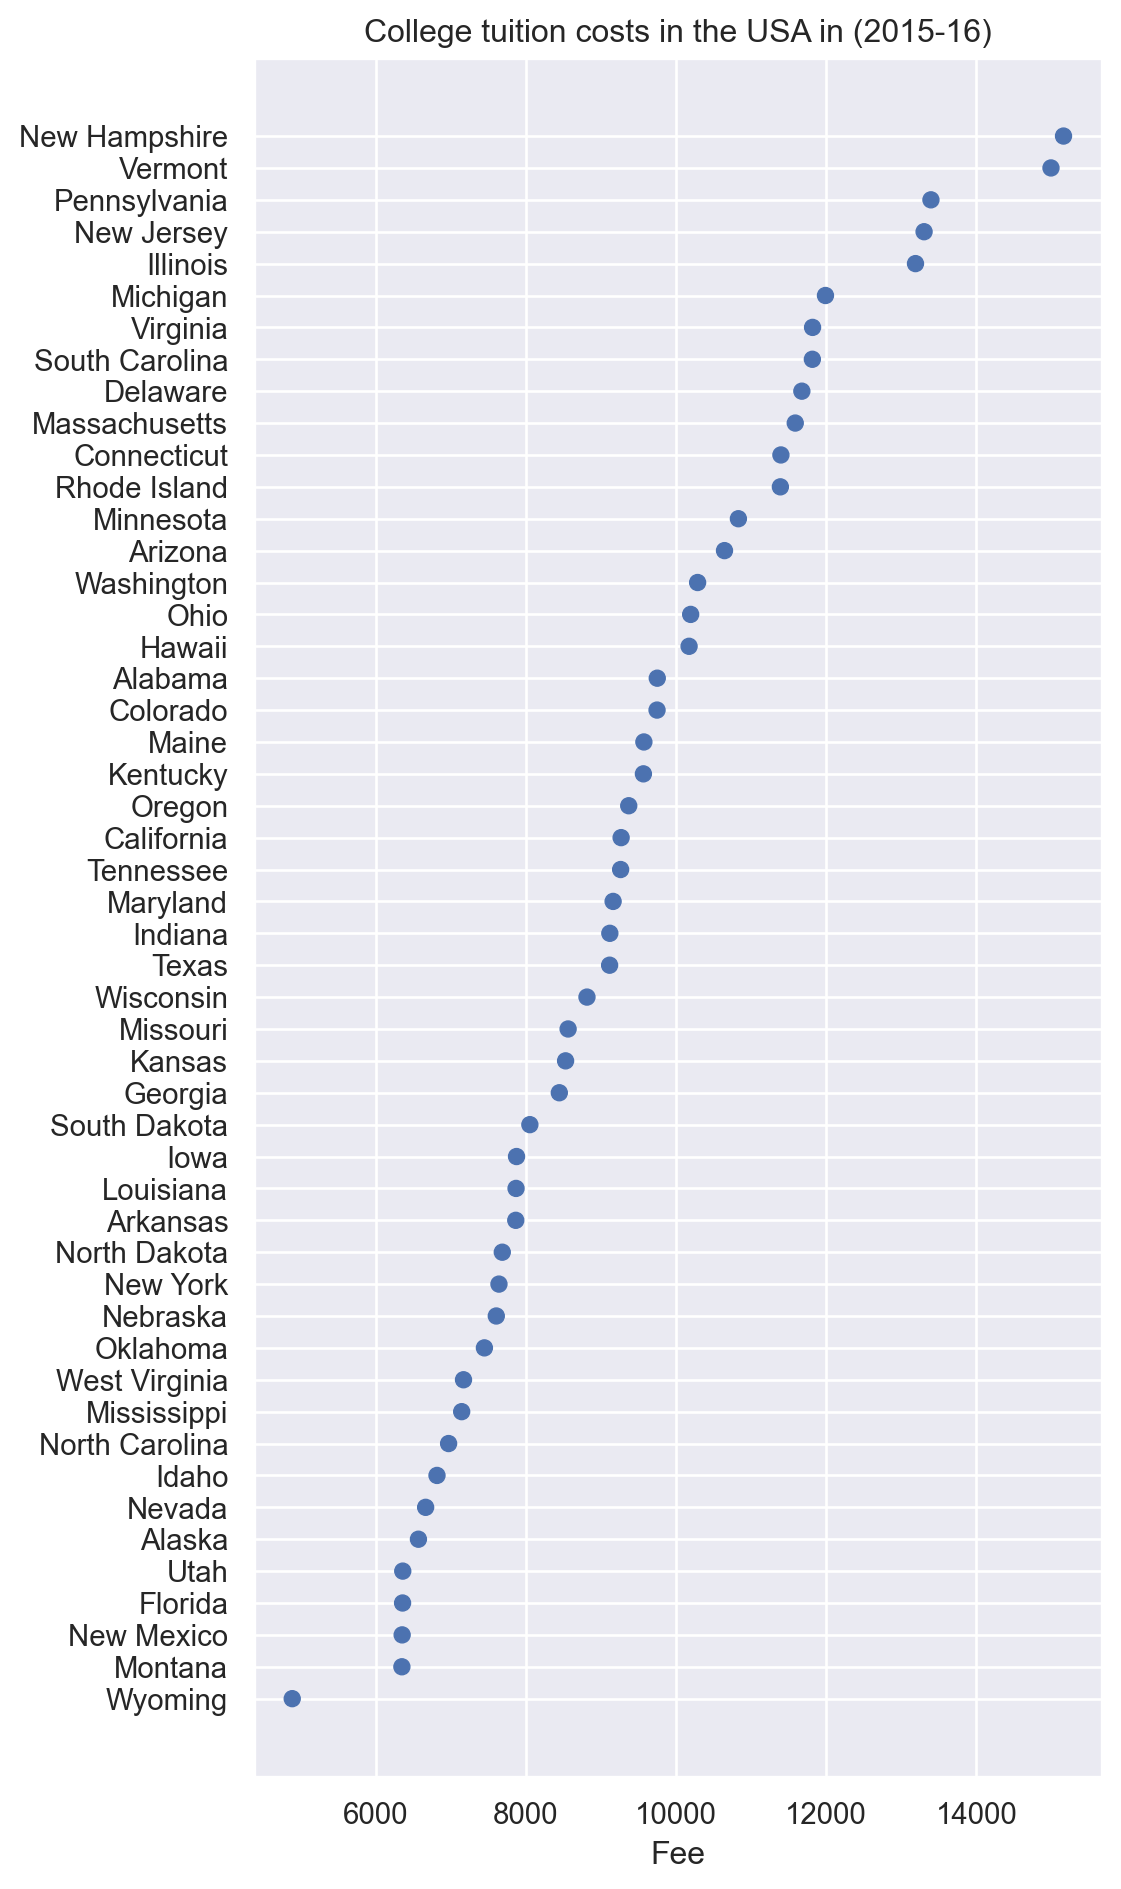

In [33]:
(so.Plot(
    data=us_avg_tuition.sort_values(by=['2015-16']),
    x='2015-16',
    y='State'
 )
 .add(so.Dot())
 .layout(size=(6, 10))
 .label(
    x='Fee',
    y='',
    title='College tuition costs in the USA in (2015-16)'
 )
)  # noqa